In [113]:
import matplotlib.pyplot as plt
import json, numpy as np
from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['font.family'] = 'serif'

data_kmp2 = None
with open('../data/diamond-dzvp-kmp2.json', 'r') as f:
    data_kmp2 = json.load(f)

data_klno = None
with open('../data/diamond-dzvp-klno.json', 'r') as f:
    data_klno = json.load(f)


ene_corr_ccsd_ref =  -0.24737370
ene_corr_ccsd_sol =  -0.24861857
error = -1.2449e-03
ene_corr_mp2_ref =  -0.23515546
ene_corr_mp2_sol =  -0.23515546
error =  0.0000e+00


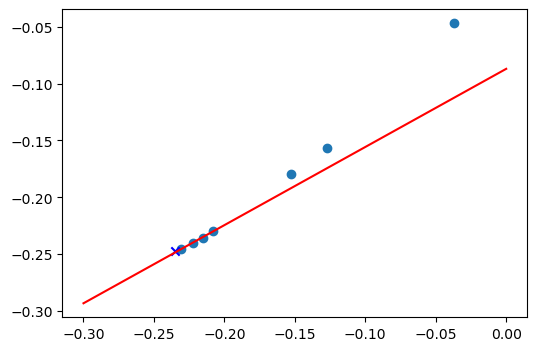

In [114]:
kmesh = "[2, 2, 2]"
basis = "gth-dzvp"
method = ["rsdf-2.0", "fftisdf-100-10"]

# E(LNOMP2) = -87.7378385257895  E_corr = -0.0367366243935613
# E(LNOMP2) = -87.8279332136916  E_corr = -0.126831312295744
# E(LNOMP2) = -87.8537026024166  E_corr = -0.152600701020965
# E(LNOMP2) = -87.909238452674  E_corr = -0.2081365512784
# E(LNOMP2) = -87.9164678254166  E_corr = -0.215365924020655
# E(LNOMP2) = -87.9236496379188  E_corr = -0.222547736522923
# E(LNOMP2) = -87.9317963547432  E_corr = -0.2306944533473173

# E(LNOCCSD) = -87.7480491571775  E_corr = -0.0469472557816444
# E(LNOCCSD) = -87.8576173000321  E_corr = -0.156515398636295
# E(LNOCCSD) = -87.881018302682  E_corr = -0.179916401286346
# E(LNOCCSD) = -87.9308142062206  E_corr = -0.229712304824915
# E(LNOCCSD) = -87.9364630689817  E_corr = -0.235361167585793
# E(LNOCCSD) = -87.9413436555544  E_corr = -0.240241754158516
# E(LNOCCSD) = -87.9463606212951  E_corr = -0.2452587198991996

# 519:ene_corr_kmp2 =  -0.23515546
# 514:ene_kccsd_corr =  -0.24737370

x = [-0.0367366243935613, -0.126831312295744, -0.152600701020965, -0.2081365512784, -0.215365924020655, -0.222547736522923, -0.2306944533473173]
y = [-0.0469472557816444, -0.156515398636295, -0.179916401286346, -0.229712304824915, -0.235361167585793, -0.240241754158516, -0.2452587198991996]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

x0 = None
for k, v in data_kmp2.items():
    is_match = True
    is_match = is_match and (v['kmesh'] == kmesh)
    is_match = is_match and (v['basis'] == basis)
    is_match = is_match and (v['method'] == method[1])

    if is_match:
        x0 = v['ene_corr_kmp2']

x = np.array(x) # [:4]
# x.sort()
y = np.array(y) # [:4]
# y.sort()
ax.scatter(x, y)

xx = np.linspace(-0.30, 0.0, 31)
ix = [3, 4, 5, 6]
a, b = np.polyfit(x[ix], y[ix], 1)
yy = a * xx + b
ax.plot(xx, yy, color='red')

x_ref = -0.23515546
y_ref = -0.24737370
ax.scatter(x_ref, y_ref, color='blue', marker='x')

x_sol = x_ref
y_sol = a * x_ref + b

print("ene_corr_ccsd_ref = % 12.8f" % y_ref)
print("ene_corr_ccsd_sol = % 12.8f" % y_sol)
print("error = % 6.4e" % (y_sol - y_ref))

print("ene_corr_mp2_ref = % 12.8f" % x_ref)
print("ene_corr_mp2_sol = % 12.8f" % x_sol)
print("error = % 6.4e" % (x_ref - x_sol))

plt.show()
        


1.6225438836147414 1.3020731889662036 -0.24467587383250697 5.992879279348691e-06


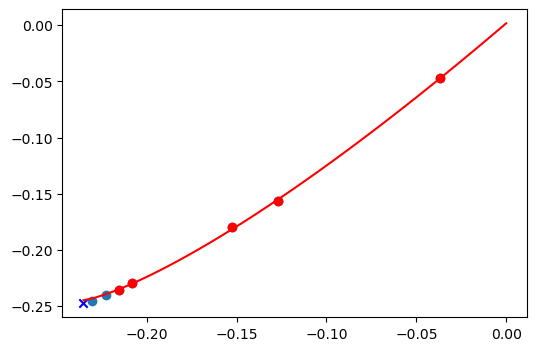

ene_corr_ccsd_ref =  -0.24737370
ene_corr_ccsd_sol =  -0.24467587
error =  2.6978e-03
ene_corr_mp2_ref =  -0.23515546
ene_corr_mp2_sol =  -0.23515546
error =  0.0000e+00


In [115]:
ix = [0, 1, 2, 3, 4]

def f(inp):
    a, b, y0 = inp
    dx = abs(x[ix] - x_ref)
    dy = y0 + a * dx ** b - y[ix]
    return np.sum(dy ** 2)

from scipy.optimize import minimize
res = minimize(f, x0=[1.0, 1.0, y_ref])
a, b, y0 = res.x
print(a, b, y0, res.fun)

xx = np.linspace(x_ref, 0.0, 41)
yy = y0 + a * (xx - x_ref) ** b

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(xx, yy, color='red')
ax.scatter(x, y)
ax.scatter(x[ix], y[ix], color='red')
ax.scatter(x_ref, y_ref, color='blue', marker='x')

plt.show()

y_sol = y0
print("ene_corr_ccsd_ref = % 12.8f" % y_ref)
print("ene_corr_ccsd_sol = % 12.8f" % y_sol)
print("error = % 6.4e" % (y_sol - y_ref))

print("ene_corr_mp2_ref = % 12.8f" % x_ref)
print("ene_corr_mp2_sol = % 12.8f" % x_sol)
print("error = % 6.4e" % (x_ref - x_sol))

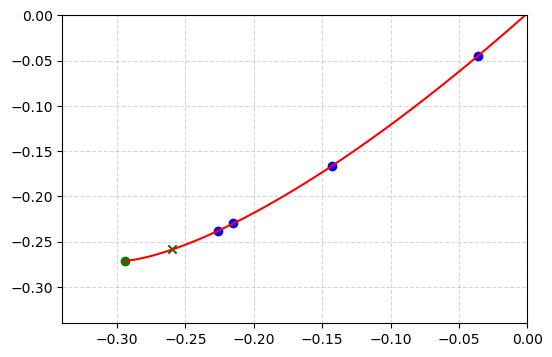

ene_corr_ccsd_ref =  -0.25823507
ene_corr_ccsd_sol =  -0.25869865
error = -4.6358e-04
ene_corr_mp2_ref =  -0.25986736
ene_corr_mp2_sol =  -0.25986736
error =  0.0000e+00
ene_corr_ccsd_ref =  -0.25823507
ene_corr_ccsd_sol =  -0.27110771
error = -1.2873e-02
ene_corr_mp2_ref =  -0.25986736
ene_corr_mp2_sol =  -0.29437223
error = -3.4505e-02
[1e-09, 1e-08, 1e-06, 0.0001]


In [116]:
kmesh = "[3, 3, 4]"
basis = "gth-dzvp"
method = "fftisdf-200-20"

data = {}

for k, v in data_klno.items():
    is_match = True
    is_match = is_match and (v['kmesh'] == kmesh)
    is_match = is_match and (v['basis'] == basis)
    is_match = is_match and (v['method'] == method)

    if is_match:
        thresh = float(k.split("/")[-1])
        data[thresh] = {
            "ene_corr_klno_mp2": v['ene_corr_klno_mp2'],
            "ene_corr_klno_ccsd": v['ene_corr_klno_ccsd'],
        }

thresh_list = list(data.keys())
thresh_list.sort()

for k, v in data_kmp2.items():
    is_match = True
    is_match = is_match and (v['kmesh'] == kmesh)
    is_match = is_match and (v['basis'] == basis)
    is_match = is_match and (v['method'] == method)
    
    if is_match:
        ene_corr_kmp2 = v.get("ene_corr_kmp2", np.nan)
        ene_corr_kccsd = v.get("ene_corr_kccsd", np.nan)
        data["ref"] = {
            "ene_corr_kmp2": ene_corr_kmp2,
            "ene_corr_kccsd": ene_corr_kccsd,
        }

if not "ref" in data:
    data["ref"] = {
        "ene_corr_kmp2": np.nan,
        "ene_corr_kccsd": np.nan,
    }

x = [data[thresh]['ene_corr_klno_mp2'] for thresh in thresh_list]
y = [data[thresh]['ene_corr_klno_ccsd'] for thresh in thresh_list]
x = np.array(x)
y = np.array(y)

if "ref" in data:
    x_ref = data["ref"]["ene_corr_kmp2"]
    y_ref = data["ref"]["ene_corr_kccsd"]
else:
    x_ref = np.nan
    y_ref = np.nan

# ix = [0, 1, 2, 3]
def f(inp):
    a, b, x0, y0 = inp
    dx = abs(x - x0)
    dy = y0 + a * dx ** b - y
    return np.sum(dy ** 2)

from scipy.optimize import minimize
res = minimize(f, x0=[1.0, 1.2, -0.25, -0.25])
a, b, x0, y0 = res.x

xx = np.linspace(x0, 0.0, 41)
yy = y0 + a * (xx - x0) ** b

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x, y, color='blue', marker='o')
ax.plot(xx, yy, color='red')

x_ref = data["ref"]["ene_corr_kmp2"]
y_ref = data["ref"]["ene_corr_kccsd"]
ax.scatter(x_ref, y_ref, color='green', marker='x')
ax.scatter(x0, y0, color='green', marker='o')
ax.set_xlim(-0.34, 0.0)
ax.set_ylim(-0.34, 0.0)
ax.grid(
    alpha=0.5,
    linestyle='--',
)

plt.show()

x_sol = x_ref
y_sol = y0 + a * (x_sol - x0) ** b

print("ene_corr_ccsd_ref = % 12.8f" % y_ref)
print("ene_corr_ccsd_sol = % 12.8f" % y_sol)
print("error = % 6.4e" % (y_sol - y_ref))

print("ene_corr_mp2_ref = % 12.8f" % x_ref)
print("ene_corr_mp2_sol = % 12.8f" % x_sol)
print("error = % 6.4e" % (x_sol - x_ref))

y_sol = y[0]
x_sol = x[0]

print("ene_corr_ccsd_ref = % 12.8f" % y_ref)
print("ene_corr_ccsd_sol = % 12.8f" % y0)
print("error = % 6.4e" % (y0 - y_ref))

print("ene_corr_mp2_ref = % 12.8f" % x_ref)
print("ene_corr_mp2_sol = % 12.8f" % x0)
print("error = % 6.4e" % (x0 - x_ref))

print(thresh_list)